In [1]:
import pandas as pd
import seaborn as sns

dc_tract_housing = pd.read_csv('../data/ACS_Housing_Characteristics_DC_Census_Tract.csv')
dc_tract_social = pd.read_csv('../data/ACS_Social_Characteristics_DC_Census_Tract.csv').loc[:,['DP02_0151E','DP02_0152E','DP02_0153E','TRACTCE']]

dc_tract_housing.set_index('TRACTCE', inplace=True)
dc_tract_social.set_index('TRACTCE', inplace=True)

dc_tract = dc_tract_housing.join(dc_tract_social)
dc_tract

,OBJECTID,STATEFP,COUNTYFP,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,DP04_0140E,DP04_0141E,DP04_0142E,DP04_0143E,GIS_ID,SHAPEAREA,SHAPELEN,DP02_0151E,DP02_0152E,DP02_0153E
TRACTCE,,,,,,,,,,,,,,,,,,,,,
1401,1,11,1,11001001401,14.01,Census Tract 14.01,G5020,S,788095,0,...,84,109,170,11,ACS_Housing_DC_CensusTract_162,0,0,1430,1410,1391
9505,2,11,1,11001009505,95.05,Census Tract 95.05,G5020,S,1032228,0,...,9,20,177,75,ACS_Housing_DC_CensusTract_32,0,0,1356,1132,1083
1902,3,11,1,11001001902,19.02,Census Tract 19.02,G5020,S,877350,0,...,26,4,48,11,ACS_Housing_DC_CensusTract_168,0,0,820,726,704
1901,4,11,1,11001001901,19.01,Census Tract 19.01,G5020,S,769306,0,...,39,52,108,50,ACS_Housing_DC_CensusTract_167,0,0,1449,1355,1281
1100,5,11,1,11001001100,11.00,Census Tract 11,G5020,S,1676650,0,...,99,91,177,28,ACS_Housing_DC_CensusTract_160,0,0,2061,1988,1817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,175,11,1,11001009802,98.02,Census Tract 98.02,G5020,S,200745,0,...,18,37,249,133,ACS_Housing_DC_CensusTract_172,0,0,733,556,468
9810,176,11,1,11001009810,98.10,Census Tract 98.10,G5020,S,398419,14058,...,129,276,429,57,ACS_Housing_DC_CensusTract_145,0,0,1263,1069,876
9811,177,11,1,11001009811,98.11,Census Tract 98.11,G5020,S,467504,0,...,93,119,806,90,ACS_Housing_DC_CensusTract_150,0,0,1826,1486,1004


For this example, using the following columns from the ACS housing data in order to derive as predictors:
* number of housing units in tract - `DP04_0006E`
* number of housing units in tract in a 20 or more unit complex - `DP04_0013E`
* number of occupied units - `DP04_0057E`
* number of occupied units without an available vehicle - `DP04_0058E`

As well as the following columns from the ACS social data:
* number of households reporting on broadband/computer access - `DP02_0151E`
* number of households with broadband internet - `DP02_0153E`
* number of households with a computer - `DP02_0152E`

We will predict the percentage of renters spending more than 35% of their income on rent:
* number of occupants paying rent - `DP04_0126E`
* number of occupants whose rent exceeds 35% of income - `DP04_0142E`

In [2]:
dc_tract = dc_tract.loc[:,['DP04_0006E', 'DP04_0013E', 'DP04_0057E',
    'DP04_0058E', 'DP04_0126E', 'DP04_0142E', 'DP02_0151E','DP02_0152E','DP02_0153E']]

#To avoid problems downstream, going to drop rows where no one is renting
#Even in reality we would likely do this because they aren't really relevant 
#in predicting percentage rent stressed.
dc_tract = dc_tract[dc_tract['DP04_0126E'] > 0]

dc_tract

,DP04_0006E,DP04_0013E,DP04_0057E,DP04_0058E,DP04_0126E,DP04_0142E,DP02_0151E,DP02_0152E,DP02_0153E
TRACTCE,,,,,,,,,
1401,1457,610,1430,316,625,170,1430,1410,1391
9505,1601,215,1356,266,374,177,1356,1132,1083
1902,863,39,820,81,125,48,820,726,704
1901,1627,21,1449,256,383,108,1449,1355,1281
1100,2254,827,2061,497,664,177,2061,1988,1817
...,...,...,...,...,...,...,...,...,...
9802,864,30,733,433,548,249,733,556,468
9810,1274,128,1263,606,1163,429,1263,1069,876
9811,2099,430,1826,930,1538,806,1826,1486,1004


In [3]:
tract_pct = pd.concat([dc_tract.loc[:,'DP04_0013E'] / dc_tract.loc[:,'DP04_0006E'],
                     dc_tract.loc[:,'DP04_0058E'] / dc_tract.loc[:,'DP04_0057E'],
                     dc_tract.loc[:,'DP04_0142E'] / dc_tract.loc[:,'DP04_0126E'],
                     dc_tract.loc[:,'DP02_0152E'] / dc_tract.loc[:,'DP02_0151E'],
                     dc_tract.loc[:,'DP02_0153E'] / dc_tract.loc[:,'DP02_0151E']], axis='columns')\
                     .rename(columns={0:'Pct_20+Complex',
                                      1:'Pct_NoVehicle',
                                      2:'Pct_Rent35%orMore',
                                      3:'Pct_AccessToComputer',
                                      4:'Pct_AccessToBroadband'})

In [4]:
tract_pct

,Pct_20+Complex,Pct_NoVehicle,Pct_Rent35%orMore,Pct_AccessToComputer,Pct_AccessToBroadband
TRACTCE,,,,,
1401,0.418668,0.220979,0.272000,0.986014,0.972727
9505,0.134291,0.196165,0.473262,0.834808,0.798673
1902,0.045191,0.098780,0.384000,0.885366,0.858537
1901,0.012907,0.176674,0.281984,0.935128,0.884058
1100,0.366903,0.241145,0.266566,0.964580,0.881611
...,...,...,...,...,...
9802,0.034722,0.590723,0.454380,0.758527,0.638472
9810,0.100471,0.479810,0.368874,0.846397,0.693587
9811,0.204859,0.509310,0.524057,0.813801,0.549836


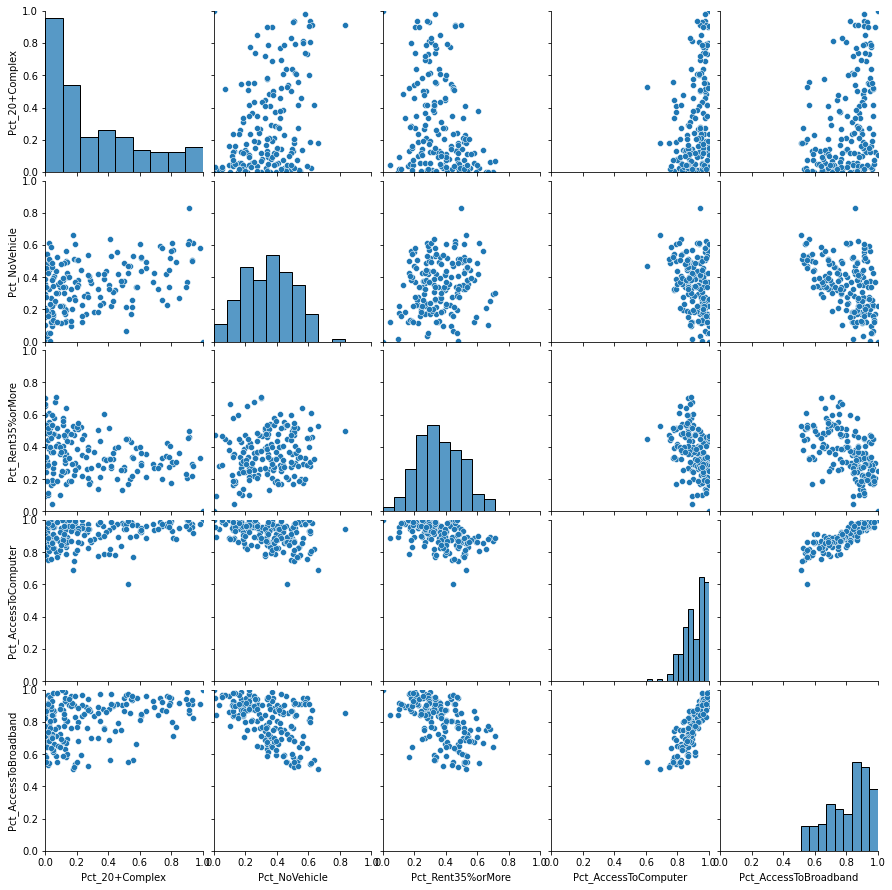

In [5]:
pair = sns.pairplot(tract_pct)
pair.set(xlim=(0,1), ylim=(0,1)) 

### Example One - Supervised Learning

First step - in order to evaluate our model, we need to split the dataset into a 'train' and 'test' dataset. The training set will be used to optimize the model to make accurate predictions, but since they were used to create the model itself, they aren't particularly useful for determining whether the model is actually useful for anything. In order to do that, we need to show the model new observations that it hasn't seen yet - the 'test' set. 

In the real world, we would not be training a model on so few observations (8 observations are insufficient to make any sort of useful prediction) - but we will do so here for ease of understanding. 

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

# all this function does is choose 25% of the data at random to be test data, and 75% to be training data
# functionally equivalent to just throwing all 8 observations in a bag and choosing 2 and 6, respectively
prenorm_tract_pct = tract_pct
tract_train, tract_test = train_test_split(tract_pct, test_size=.25, train_size=.75, random_state=550) #

In [7]:
#first let's scale the input features - as percentages they shouldn't be too bad,
#but since some of the above pairplots are skewed, our estimates will be better 
#if we scale. 

from sklearn.preprocessing import StandardScaler

def normalize(obj, feat = None, scaler = None):
    '''
    Normalizes a series or a dataframe using sklearn's standard scaler (z score). 
    Effectively subtracts mean and divides by sample deviation (z = (x - u) / s).
    Returns a series or a dataframe depending on input. If scaler is provided, 
    will normalize using the pre-fit scaler (useful for test normalization.)
    '''
    if isinstance(obj, pd.Series):
        if type(obj[0]) in [np.int64, int, float]:
            if not scaler:
                scaler = StandardScaler().fit(obj.to_frame())
            rv = pd.Series(scaler.transform(obj.to_frame()).squeeze())
            return (rv, scaler)
        else:
            return (obj, scaler)
    elif isinstance(obj, pd.DataFrame):
        if not feat:
            feat = obj.columns
        if not scaler:
            scaler = StandardScaler().fit(obj[feat])
        normalized_df = scaler.transform(obj[feat])
        normalized_df = pd.DataFrame(normalized_df)
        normalized_df.columns = feat
        normalized_df.index = obj.index
        return (normalized_df, scaler)

tract_train_target = tract_train.loc[:,'Pct_Rent35%orMore']
tract_test_target = tract_test.loc[:,'Pct_Rent35%orMore']

tract_train.drop('Pct_Rent35%orMore', axis = 1, inplace=True)
tract_test.drop('Pct_Rent35%orMore', axis = 1, inplace=True)

tract_train, train_scaler = normalize(tract_train)
tract_test, _ = normalize(tract_test, scaler = train_scaler)

/home/nick/miniconda3/envs/BPC/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
#now we set up the linear regressor using the training data
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

tract_test.loc[:,'Data type'] = 'Test data'
tract_train.loc[:,'Data type'] = 'Training data'

tract_pct = pd.concat([tract_train, tract_test], axis = 'rows')
prenorm_tract_pct = pd.merge(prenorm_tract_pct, tract_pct.loc[:,['Data type']], left_index=True, right_index=True)
prenorm_tract_pct.to_csv('tract_data_combined.csv')

lin_reg.fit(tract_train.loc[:,['Pct_AccessToBroadband']], tract_train_target)


LinearRegression()

In [9]:
prenorm_tract_pct.head()

,Pct_20+Complex,Pct_NoVehicle,Pct_Rent35%orMore,Pct_AccessToComputer,Pct_AccessToBroadband,Data type
TRACTCE,,,,,,
1401,0.418668,0.220979,0.272000,0.986014,0.972727,Training data
9505,0.134291,0.196165,0.473262,0.834808,0.798673,Test data
1902,0.045191,0.098780,0.384000,0.885366,0.858537,Training data
1901,0.012907,0.176674,0.281984,0.935128,0.884058,Test data
1100,0.366903,0.241145,0.266566,0.964580,0.881611,Training data


In [10]:
tract_train.head()

,Pct_20+Complex,Pct_NoVehicle,Pct_AccessToComputer,Pct_AccessToBroadband,Data type
TRACTCE,,,,,
8802,-0.757519,-0.089482,-0.663704,-0.640590,Training data
701,1.628987,-0.802363,0.751089,1.107198,Training data
7809,-1.089342,0.002502,-1.155895,-0.761418,Training data
9508,0.223218,0.183839,-1.742104,-0.374699,Training data
1402,0.472245,-0.210889,-1.852723,-0.531979,Training data


In [11]:
tract_test.head()

,Pct_20+Complex,Pct_NoVehicle,Pct_AccessToComputer,Pct_AccessToBroadband,Data type
TRACTCE,,,,,
9901,-1.089342,-1.583565,-0.458586,-0.289272,Test data
3302,-0.960761,-1.439969,1.244602,0.657744,Test data
7404,-0.915008,0.242199,-1.195023,-1.412450,Test data
600,0.436212,-0.628075,0.590172,0.656997,Test data
1002,0.821421,-1.125966,1.073810,1.010299,Test data


In [12]:
prenorm_tract_pct

,Pct_20+Complex,Pct_NoVehicle,Pct_Rent35%orMore,Pct_AccessToComputer,Pct_AccessToBroadband,Data type
TRACTCE,,,,,,
1401,0.418668,0.220979,0.272000,0.986014,0.972727,Training data
9505,0.134291,0.196165,0.473262,0.834808,0.798673,Test data
1902,0.045191,0.098780,0.384000,0.885366,0.858537,Training data
1901,0.012907,0.176674,0.281984,0.935128,0.884058,Test data
1100,0.366903,0.241145,0.266566,0.964580,0.881611,Training data
...,...,...,...,...,...,...
9802,0.034722,0.590723,0.454380,0.758527,0.638472,Training data
9810,0.100471,0.479810,0.368874,0.846397,0.693587,Training data
9811,0.204859,0.509310,0.524057,0.813801,0.549836,Training data


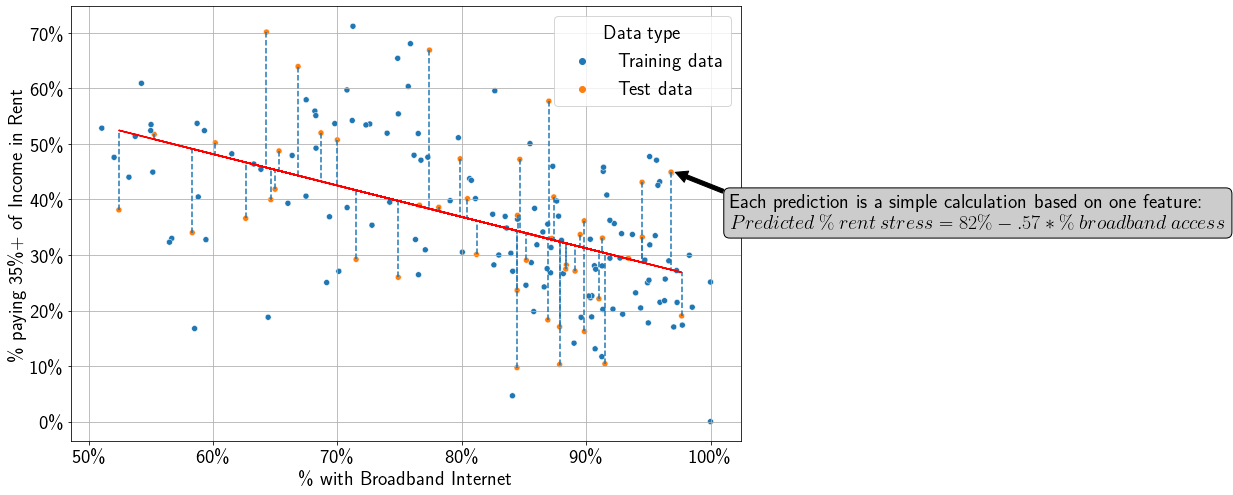

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

font = {'weight' : 'bold',
        'size'   : 20}
plt.rcParams.update({
    "text.usetex": True})
plt.rc(
    'text.latex', preamble=r"\usepackage{color}")

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(x = 'Pct_AccessToBroadband', y = 'Pct_Rent35%orMore', hue = 'Data type', data = prenorm_tract_pct)

x_actual = prenorm_tract_pct[prenorm_tract_pct['Data type'] == 'Test data'].loc[:,['Pct_AccessToBroadband']] #plot with the un-normalized values
y_actual = tract_test_target
y_predicted = pd.DataFrame(lin_reg.predict(tract_test.loc[:,['Pct_AccessToBroadband']]),
                           index= tract_test.index,
                           columns=['predicted_univariate']) #predict with the normalized values (prediction will be non-normalized)
plt_dat = pd.concat([x_actual, y_actual, y_predicted], axis='columns')
plt_dat.head()
plt.plot('Pct_AccessToBroadband', 'predicted_univariate', data=plt_dat, color = 'red')

plt.vlines(x = 'Pct_AccessToBroadband',
           ymin = 'Pct_Rent35%orMore',
           ymax = 'predicted_univariate',
           data= plt_dat,
           linestyles='dashed')
plt.xlabel('\% with Broadband Internet')
plt.ylabel('\% paying 35\%+ of Income in Rent')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

ax.annotate(
'''Each prediction is a simple calculation based on one feature:
$\:\:\:\:Predicted\:\%\:rent\:stress = 82\% - .57 * \%\:broadband\:access$''',
            xy=(0.968254 + .003, 0.449339), xycoords='data',
            xytext=(55, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.01),
            bbox=dict(boxstyle="round", fc="0.8"),
            horizontalalignment='left', verticalalignment='bottom')

plt.grid(which = 'both')
plt.savefig('Supervised_justBroadband.png', bbox_inches="tight")

plt.show()

In [14]:
# print('Pct_AccessToBroadband' + ': {:.2f}'.format(train_scaler.inverse_transform(lin_reg.coef_[0])))

In [15]:
tract_train.mean(), tract_train.std()
#the original training data is z-transformed,
#so, in order to get the beta coefficients back into 
#the original units, we need to multiply by the std of the feat and add the mean

(Pct_20+Complex          -3.364312e-17
 Pct_NoVehicle           -4.878253e-17
 Pct_AccessToComputer    -1.594684e-15
 Pct_AccessToBroadband    4.844610e-16
 dtype: float64,
 Pct_20+Complex           1.00381
 Pct_NoVehicle            1.00381
 Pct_AccessToComputer     1.00381
 Pct_AccessToBroadband    1.00381
 dtype: float64)

In [16]:
#since the 

lin_reg.coef_[0]

-0.0743623764774096

In [17]:
lin_reg.intercept_

0.3618140905801514

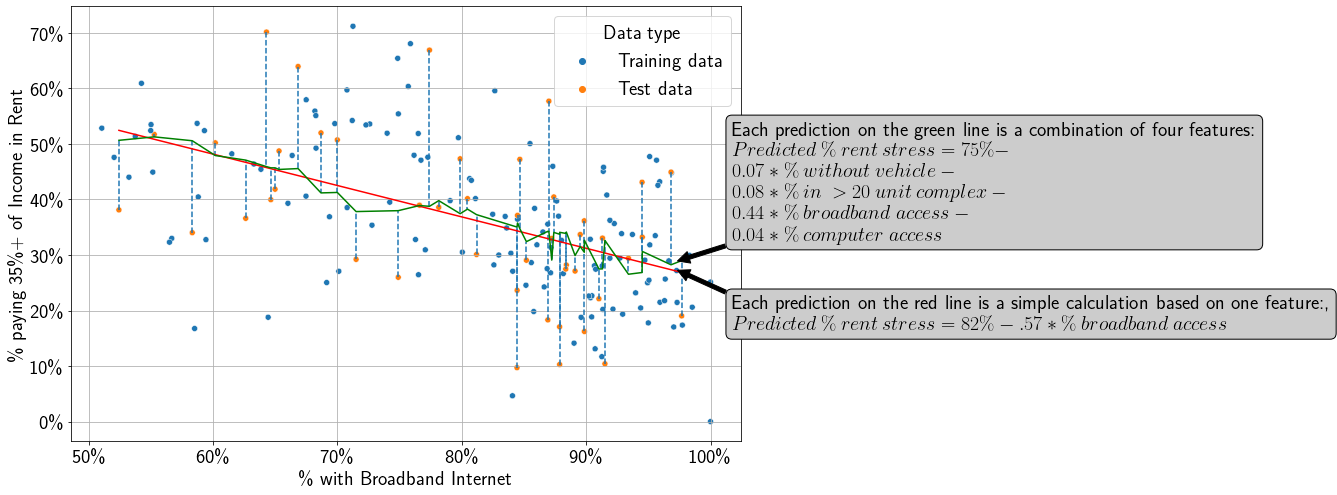

In [18]:
matplotlib.rc('font', **font)
lin_reg.fit(tract_train.loc[:,['Pct_20+Complex', 'Pct_NoVehicle', 'Pct_AccessToBroadband', 'Pct_AccessToComputer']], tract_train_target)

fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(x = 'Pct_AccessToBroadband', y = 'Pct_Rent35%orMore', hue = 'Data type', data = prenorm_tract_pct)

y_predicted = pd.DataFrame(lin_reg.predict(tract_test.loc[:,['Pct_20+Complex', 'Pct_NoVehicle', 'Pct_AccessToBroadband', 'Pct_AccessToComputer']]),
                           index= tract_test.index,
                           columns=['predicted_multivariate'])

plt_dat = pd.concat([plt_dat, y_predicted], axis='columns').sort_values('Pct_AccessToBroadband')
plt.plot('Pct_AccessToBroadband', 'predicted_univariate', data=plt_dat, color = 'red')
plt.plot('Pct_AccessToBroadband', 'predicted_multivariate', data=plt_dat, color = 'green')

plt.vlines(x = 'Pct_AccessToBroadband',
           ymin = 'Pct_Rent35%orMore',
           ymax = 'predicted_multivariate',
           data= plt_dat,
           linestyles='dashed')
plt.xlabel('\% with Broadband Internet')
plt.ylabel('\% paying 35\%+ of Income in Rent')

#Tract 202 is a good one to illustrate

ax.annotate(
'''Each prediction on the green line is a combination of four features:
$\:\:\:\:Predicted\:\%\:rent\:stress = 75\% - $
        $ 0.07 * \%\:without\:vehicle\: -$
        $ 0.08 * \%\:in\:>20\:unit\:complex\:-$
        $ 0.44 * \%\:broadband\:access\:-$
        $ 0.04 * \%\:computer\:access$''',
            xy=(0.97 + .003, 0.289), xycoords='data',
            xytext=(55, 140), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.01),
            bbox=dict(boxstyle="round", fc="0.8"),
            horizontalalignment='left', verticalalignment='top')

ax.annotate(
'''Each prediction on the red line is a simple calculation based on one feature:,
$\:\:\:\:Predicted\:\%\:rent\:stress = 82\% - .57 * \%\:broadband\:access$''',
            xy=(0.97 + .003, 0.273), xycoords='data',
            xytext=(55, -25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.01),
            bbox=dict(boxstyle="round", fc="0.8"),
            horizontalalignment='left', verticalalignment='top')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

plt.grid(which = 'both')
plt.savefig('Supervised_AllParameters.png', bbox_inches="tight")

plt.show()

In [19]:
tract_pct[tract_pct.index == 202]

,Pct_20+Complex,Pct_NoVehicle,Pct_AccessToComputer,Pct_AccessToBroadband,Data type
TRACTCE,,,,,
202,-0.263596,-1.204137,1.244602,1.187328,Test data


In [20]:
coefs = ['Pct_20+Complex', 'Pct_NoVehicle', 'Pct_AccessToBroadband', 'Pct_AccessToComputer']
for idx, coef in enumerate(coefs):
    print(coef + ': {:.2f}'.format(lin_reg.coef_[idx]))

Pct_20+Complex: -0.02
Pct_NoVehicle: 0.01
Pct_AccessToBroadband: -0.06
Pct_AccessToComputer: -0.00
